Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        

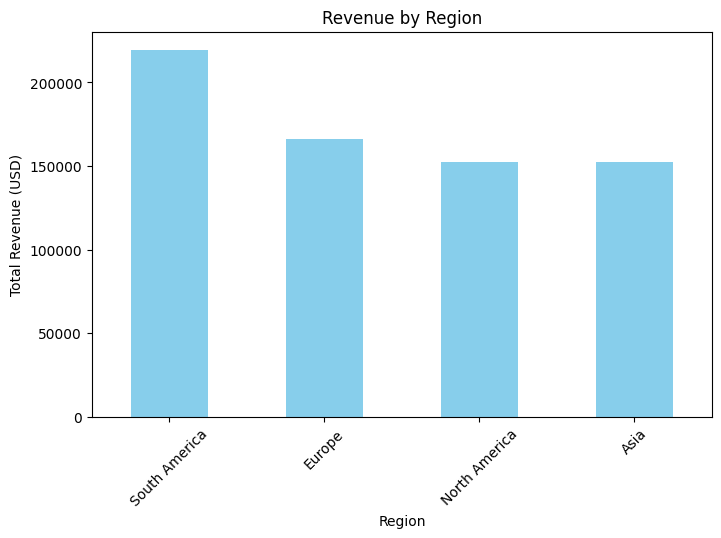

Top 10 Popular Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64 



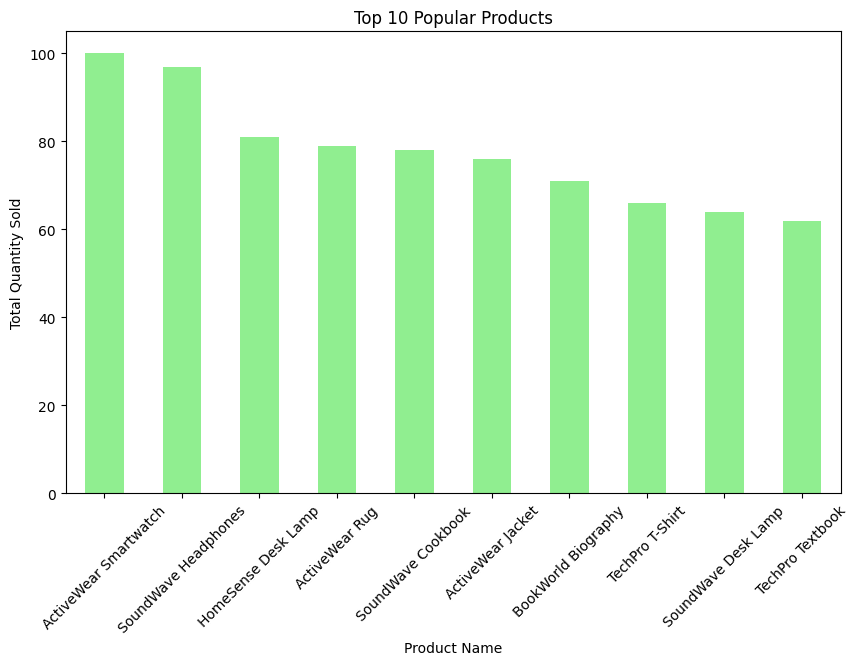

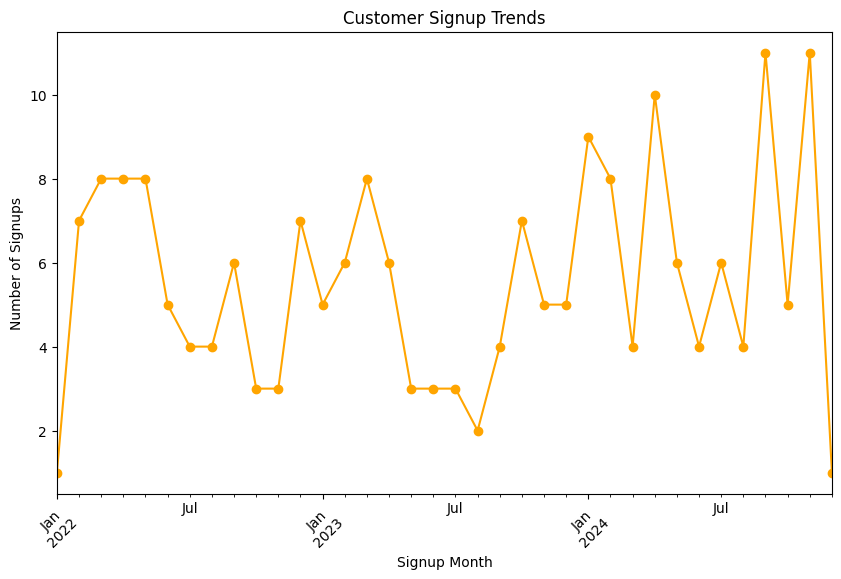

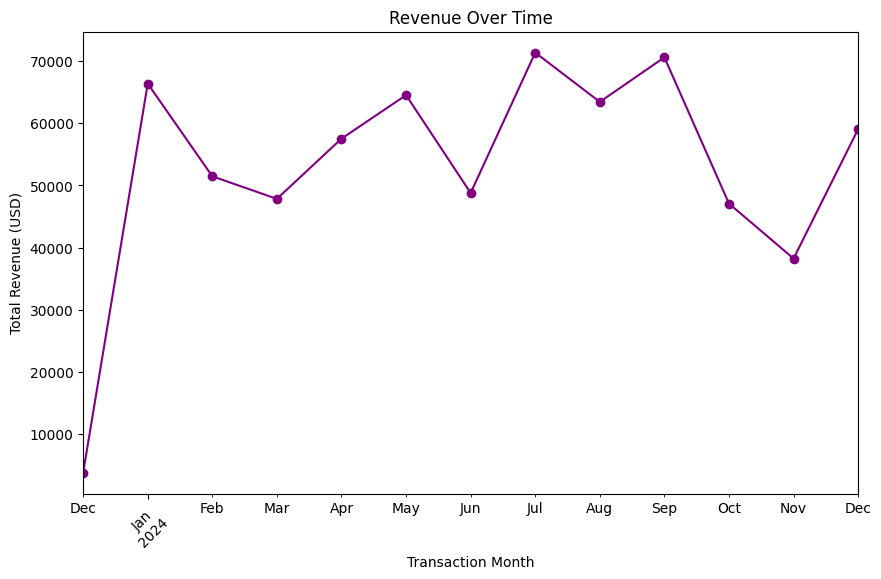

Business Insights:
1. The total revenue generated from all transactions is $689995.56.
2. The region generating the highest revenue is 'South America' with a total of $219352.56.
3. The most popular product is 'ActiveWear Smartwatch' with 100 units sold.
4. Customer signups peaked in the month of 2024-09.
5. Revenue has been trending irregularly over time.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display basic information about the datasets
print("Customers Dataset:")
print(customers.info(), "\n")
print("Products Dataset:")
print(products.info(), "\n")
print("Transactions Dataset:")
print(transactions.info(), "\n")

# Check for missing values
print("Missing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum(), "\n")

# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Basic statistics
print("Basic Statistics:")
print(merged_data.describe(), "\n")

# Exploratory Data Analysis (EDA)

## 1. Total Revenue Analysis
total_revenue = merged_data['TotalValue'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

## 2. Revenue by Region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", revenue_by_region, "\n")

# Plot revenue by region
plt.figure(figsize=(8, 5))
revenue_by_region.plot(kind='bar', color='skyblue')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

## 3. Popular Products
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Popular Products:\n", popular_products, "\n")

# Plot popular products
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Popular Products')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

## 4. Signup Trends
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

# Plot signup trends
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='orange')
plt.title('Customer Signup Trends')
plt.ylabel('Number of Signups')
plt.xlabel('Signup Month')
plt.xticks(rotation=45)
plt.show()

## 5. Revenue Over Time
revenue_over_time = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot revenue over time
plt.figure(figsize=(10, 6))
revenue_over_time.plot(kind='line', marker='o', color='purple')
plt.title('Revenue Over Time')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Transaction Month')
plt.xticks(rotation=45)
plt.show()

# Insights
print("Business Insights:")
print("1. The total revenue generated from all transactions is ${:.2f}.".format(total_revenue))
print("2. The region generating the highest revenue is '{}' with a total of ${:.2f}.".format(revenue_by_region.idxmax(), revenue_by_region.max()))
print("3. The most popular product is '{}' with {} units sold.".format(popular_products.idxmax(), popular_products.max()))
print("4. Customer signups peaked in the month of {}.".format(signup_trends.idxmax()))
print("5. Revenue has been trending {} over time.".format("upward" if revenue_over_time.is_monotonic_increasing else "irregularly"))
